%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


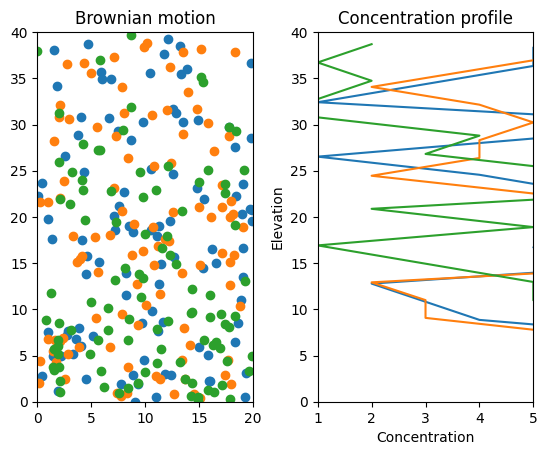

In [1]:
######################### A Brownian Motion simulation developed by Carmen Lee for PHYS 4S03 tutorial #1 python v3.6 ##########################

#################Modules###########################
%matplotlib inline
%pylab inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML
##########################Variables################
N = 100 #number of particles
boxSizeX = 20 # width
boxSizeY = 40 # height
R = 0.25 #particle size
timeStep = 500 #length of the simulation

histogrambin = 20 #histogram bins when calculating the concentration profile

a = 1/np.sqrt(R)


####################Initialize#####################
particles = []

for n in range(N):
    x = np.random.rand()*boxSizeX
    y = np.random.rand()*boxSizeY
    particles.append([x, y])

######################Functions###############################
def move(x, y):
    header = np.random.rand()*2*np.pi
    newx = x + a*np.cos(header)
    newy = y + a*np.sin(header)-R**2
    while newx < 0 or newx >= boxSizeX or newy < 0 or newy >= boxSizeY: #keeps particles inside the box by resetting the header direction to keep it within the box
        header = np.random.rand()*2*np.pi
        newx = x + a*np.cos(header)
        newy = y + a*np.sin(header)
    #reset header for the next time step
    return([newx, newy])

#######################progressing the simulation###########################

positionDataX = [] #saves the group x data for each time step
positionDataY = [] #saves the group y data for each time step
for t in range(timeStep):
    x = []
    y = []
    for turtle in range(N):
        particles[turtle] = move(particles[turtle][0], particles[turtle][1])
        x.append(particles[turtle][0])
        y.append(particles[turtle][1])
    positionDataX.append(x)
    positionDataY.append(y)

fig, (ax1, ax2) = plt.subplots(ncols=2)
fig.subplots_adjust(wspace = 0.3)

ax1.set(xlim = (0, boxSizeX), ylim=(0, boxSizeY), title = 'Brownian motion')
ax2.set(xlim =  (1, N/histogrambin), ylim =(0, boxSizeY), xlabel = 'Concentration', ylabel = 'Elevation', title = 'Concentration profile')

ax1.plot(positionDataX[0],positionDataY[0], 'o')
histo = np.histogram(positionDataY[0], histogrambin) # creates a histogram of all data
ax2.plot(histo[0] , histo[1][0:-1]+0.5*boxSizeY/histogrambin )

ax1.plot(positionDataX[1],positionDataY[1], 'o')
histo = np.histogram(positionDataY[1], histogrambin) # creates a histogram of all data
ax2.plot(histo[0] , histo[1][0:-1]+0.5*boxSizeY/histogrambin )

ax1.plot(positionDataX[-1],positionDataY[-1], 'o')
histo = np.histogram(positionDataY[-1], histogrambin) # creates a histogram of all data
ax2.plot(histo[0] , histo[1][0:-1]+0.5*boxSizeY/histogrambin )

In [3]:
##################Animating the simulation #################

fig, (ax1, ax2) = plt.subplots(ncols=2)
fig.subplots_adjust(wspace = 0.3)

ax1.set(xlim = (0, boxSizeX), ylim=(0, boxSizeY), title = 'Brownian motion')
ax2.set(xlim =  (1, N/histogrambin), ylim =(0, boxSizeY), xlabel = 'Concentration', ylabel = 'Elevation', title = 'Concentration profile')

plotter, = ax1.plot([], [], 'bo', markersize = R)
plotterConc, = ax2.plot([], [], 'k-')


from tempfile import NamedTemporaryFile

VIDEO_TAG = """<video controls>
 <source src="data:video/x-m4v;base64,{0}" type="video/mp4">
</video>"""

def anim_to_html(anim):
    if not hasattr(anim, '_encoded_video'):
        with NamedTemporaryFile(suffix='.mp4') as f:
            anim.save(f.name, fps=20)
            video = open(f.name, "rb").read()
    anim.to_html5_video()
    return VIDEO_TAG.format(anim.to_html5_video())
def display_animation(anim):
    plt.close(anim._fig)
    return HTML(anim_to_html(anim))
def animate(i):
    plotter.set(xdata =positionDataX[i], ydata =positionDataY[i])
    hist = np.histogram(positionDataY[i], histogrambin) # creates a histogram of all data
    plotterConc.set(xdata =hist[0] , ydata = hist[1][0:-1]+0.5*boxSizeY/histogrambin)
    
    #the histogram function labels the outside of the bins that it counts from. Here, I've shifted the y data by half of the bin width to even out the profile
    

ani = animation.FuncAnimation(fig, animate, frames=timeStep)
display_animation(ani)
plt.show()


MovieWriter ffmpeg unavailable; using Pillow instead.


ValueError: unknown file extension: .mp4